# Data Acquisition & Preparation

In [4]:
#   Data Acquisition & Preparation

# 1. Install and Import Required Packages
!pip install -q ucimlrepo
!pip install -q ydata_profiling  # formerly pandas_profiling
!pip install -q pandera
!pip install umap-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pandera as pa
from pandera import DataFrameSchema, Column, Check

#from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo

sns.set_theme(style="whitegrid")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.2/264.2 kB 20.0 MB/s eta 0:00:00


=== Metadata ===
{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symb

,ID,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0,1,1,1,40,1,0,0,0,0,...,0,5,18,15,1,0,9,4,3,0
1,1,0,0,0,25,1,0,0,1,0,...,1,3,0,0,0,0,7,6,1,0
2,2,1,1,1,28,0,0,0,0,1,...,1,5,30,30,1,0,9,4,8,0
3,3,1,0,1,27,0,0,0,1,1,...,0,2,0,0,0,0,11,3,6,0
4,4,1,1,1,24,0,0,0,1,1,...,0,2,3,0,0,0,11,5,4,0



=== Final Columns in X ===
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Shape of X: (253680, 21)
Shape of y: (253680,)

Missing values in X:
 HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Missing values in y:
 0

Number of duplicated IDs: 0

Data types in X:
 HighBP   

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000



=== Correlation Matrix (Numeric Features) ===


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HighBP,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929
Veggies,-0.061266,-0.039874,0.006121,-0.062275,-0.030678,-0.041124,-0.039167,0.153150,0.254342,1.000000,...,0.029584,-0.032232,-0.123066,-0.058884,-0.064290,-0.080506,-0.064765,-0.009771,0.154329,0.151087


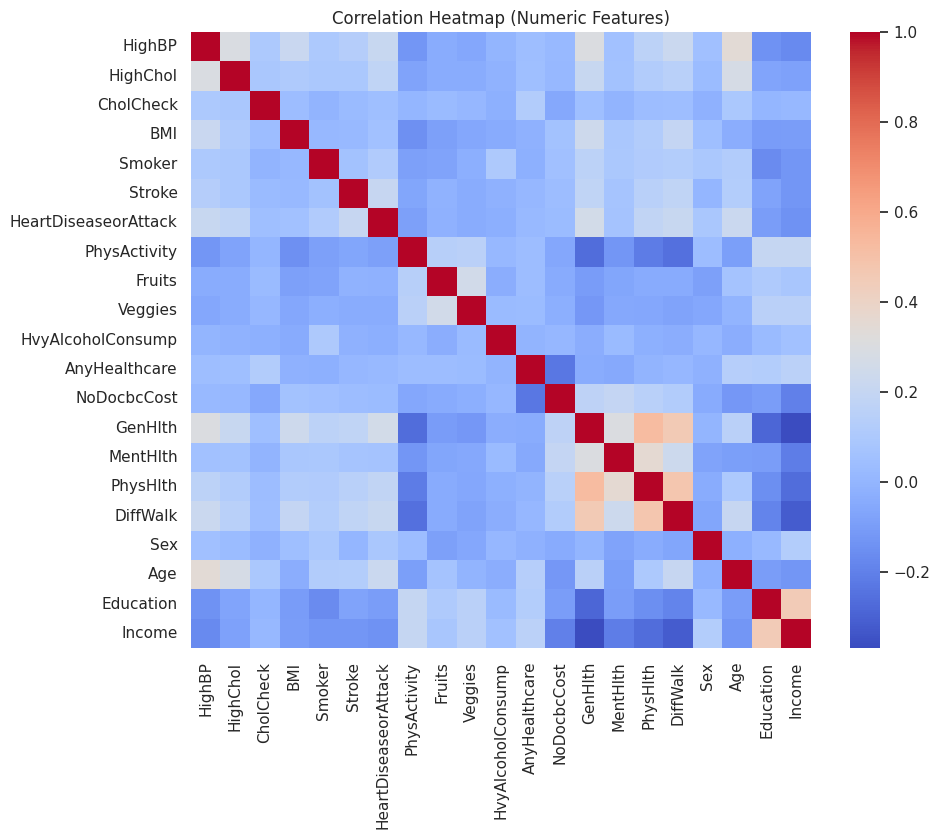


Correlation between BMI and Age (binned 1..13): -0.037

Data validation passed with pandera! No schema violations found.

Number of BMI values outside [10, 100]: 0

=== X_encoded Example (One-Hot for Sex, Education, Income) ===
Original shape: (253680, 21), Encoded shape: (253680, 31)


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,Education_4,Education_5,Education_6,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8
0,1,1,1,40,1,0,0,0,0,1,...,True,False,False,False,True,False,False,False,False,False
1,0,0,0,25,1,0,0,1,0,0,...,False,False,True,False,False,False,False,False,False,False
2,1,1,1,28,0,0,0,0,1,0,...,True,False,False,False,False,False,False,False,False,True
3,1,0,1,27,0,0,0,1,1,1,...,False,False,False,False,False,False,False,True,False,False
4,1,1,1,24,0,0,0,1,1,1,...,False,True,False,False,False,True,False,False,False,False



=== Final Data Summary ===
Shape of X: (253680, 21)
Shape of y: (253680,)
Columns in X: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Sample of ID Column: [0, 1, 2, 3, 4]

Sample of X after cleaning and optional capping:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [5]:
# 2. Fetch Metadata and Attempt to Construct a Full DataFrame
cdc_data = fetch_ucirepo(id=891)

# Print metadata for confirmation
print("=== Metadata ===")
print(cdc_data.metadata)

# Attempt to retrieve a raw/full DataFrame. If not available, manually combine features + target.
df = None
try:
    df = cdc_data.data.raw  # This often may be None for certain repos
except AttributeError:
    pass

if df is None:
    # cdc_data.data.features => X
    # cdc_data.data.targets  => y
    X = cdc_data.data.features
    y = cdc_data.data.targets

    # If 'ID' is not in X, use the index as a fallback:
    if 'ID' not in X.columns:
        print("\n'ID' column not found in features. Attempting to use the DataFrame index as ID.")
        X = X.reset_index().rename(columns={'index': 'ID'})

    # Combine features + target
    if 'Diabetes_binary' not in X.columns:
        df = pd.concat([X, y], axis=1)
    else:
        # If features already have 'Diabetes_binary', just use X
        df = X.copy()
        if not df['Diabetes_binary'].equals(y.squeeze()):
            raise ValueError("Mismatch between existing 'Diabetes_binary' in X and y.")

if df is None:
    raise ValueError("Failed to build a full DataFrame.")

print("\n=== Full Raw DataFrame Shape ===")
print(df.shape)

print("\n=== First 5 Rows of Full DataFrame ===")
display(df.head())

# 3. Separate Into Features (X) and Target (y)
if 'Diabetes_binary' not in df.columns:
    raise ValueError("Target column 'Diabetes_binary' not found in the DataFrame.")

ID_col = df['ID'] if 'ID' in df.columns else None
feature_cols = [col for col in df.columns if col not in ['ID', 'Diabetes_binary']]
X = df[feature_cols].copy()
y = df['Diabetes_binary'].copy()

print("\n=== Final Columns in X ===")
print(X.columns.tolist())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 4. Basic Data Quality Checks
print("\nMissing values in X:\n", X.isnull().sum())
print("\nMissing values in y:\n", y.isnull().sum())

# Duplicates by ID if ID exists:
if ID_col is not None:
    duplicates_by_id = df.duplicated(subset=['ID'], keep=False)
    num_duplicates = duplicates_by_id.sum()
    print(f"\nNumber of duplicated IDs: {num_duplicates}")
    if num_duplicates > 0:
        print("\nSample duplicated rows based on 'ID':")
        display(df[duplicates_by_id].head(10))
else:
    print("\nNo 'ID' column available to check for duplicates by ID.")

# Show data types
print("\nData types in X:\n", X.dtypes)
print("Data type of y:", y.dtype)

# Basic stats
print("\n--- Descriptive Statistics ---")
display(X.describe(include='all'))

# 5. Domain Logic Checks
if 'Age' in X.columns:
    invalid_age = X[~X['Age'].between(1, 13)]
    if len(invalid_age) > 0:
        print(f"\nFound {len(invalid_age)} rows with invalid Age:")
        display(invalid_age)
        # Decide how to handle them: drop, or set to nearest valid category, etc.

# 6. Correlation Checks (numeric features)
# Identify numeric columns
numeric_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
# Create correlation matrix
corr_matrix = X[numeric_cols].corr()
print("\n=== Correlation Matrix (Numeric Features) ===")
display(corr_matrix)

# Optional: Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

# For example, check correlation between Age (1..13 bucket) and BMI
if 'Age' in X.columns and 'BMI' in X.columns:
    corr_bmi_age = corr_matrix.loc['BMI', 'Age']
    print(f"\nCorrelation between BMI and Age (binned 1..13): {corr_bmi_age:.3f}")

# 7. pandera Data Validation
# Because we found BMI values up to 98, let's expand allowable range to 100:
schema_dict = {}
possible_binary_cols = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare',
    'NoDocbcCost', 'DiffWalk', 'Sex'
]
for col in possible_binary_cols:
    if col in X.columns:
        schema_dict[col] = Column(
            int,
            Check(lambda s: s.isin([0, 1])),
            nullable=False
        )

# Expand BMI upper bound to 100:
if 'BMI' in X.columns:
    schema_dict['BMI'] = Column(
        int,
        Check(lambda s: (s >= 10) & (s <= 100)),  # updated range
        nullable=False
    )

if 'Age' in X.columns:
    schema_dict['Age'] = Column(
        int,
        Check(lambda s: (s >= 1) & (s <= 13)),
        nullable=False
    )

df_schema = DataFrameSchema(schema_dict)

try:
    X_validated = df_schema.validate(X, lazy=True)
    print("\nData validation passed with pandera! No schema violations found.")
except pa.errors.SchemaErrors as e:
    print("\nSchema validation errors encountered:\n", e.failure_cases)
    # If errors remain, investigate or handle out-of-range rows.

# 8. Formal Outlier Decision for BMI
# Example approach: cap BMI at 100 if you prefer not to discard these records
if 'BMI' in X.columns:
    outlier_mask = (X['BMI'] < 10) | (X['BMI'] > 100)
    num_outliers_bmi = outlier_mask.sum()
    print(f"\nNumber of BMI values outside [10, 100]: {num_outliers_bmi}")

    if num_outliers_bmi > 0:
        print("\nCapping BMI values to [10, 100] range...")
        X['BMI'] = X['BMI'].clip(lower=10, upper=100)

# Alternatively, you could drop or separately analyze these outliers:
# X = X[~outlier_mask]
# y = y[~outlier_mask]

# 9. Categorical Encoding for Next Steps
categorical_cols = []
if 'Sex' in X.columns:
    categorical_cols.append('Sex')
if 'Education' in X.columns:
    categorical_cols.append('Education')
if 'Income' in X.columns:
    categorical_cols.append('Income')

# We show one-hot encoding (get_dummies) for demonstration
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("\n=== X_encoded Example (One-Hot for Sex, Education, Income) ===")
print(f"Original shape: {X.shape}, Encoded shape: {X_encoded.shape}")
display(X_encoded.head())

# If you prefer ordinal encoding:
# from sklearn.preprocessing import OrdinalEncoder
# ord_enc = OrdinalEncoder()
# X[['Education', 'Income']] = ord_enc.fit_transform(X[['Education','Income']])

# 10. Final Data Summary & Documentation
print("\n=== Final Data Summary ===")
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Columns in X:", X.columns.tolist())
if ID_col is not None:
    print("Sample of ID Column:", ID_col.head().tolist())

print("\nSample of X after cleaning and optional capping:")
display(X.head())

# Exploratory Data Analysis (EDA)

EDA helps you understand the shape, patterns, and
anomalies in your dataset. Through visualizations and summary statistics, you’ll detect
relationships and guide your modeling strategy. Incorporating unsupervised learning at
this stage can reveal hidden structure in your data and provide valuable intuition.

* Conduct an initial investigation to understand the structure, trends, and potential
issues in the data.
* Use visualizations and descriptive statistics to generate insights and guide your
next steps.
* Incorporate unsupervised learning methods (e.g., clustering or dimensionality
reduction) to discover structure, reduce complexity, or engineering features

In [6]:
from sklearn.preprocessing import StandardScaler
import umap.umap_ as umap
from sklearn.decomposition import PCA, NMF
from sklearn.cluster import KMeans, SpectralClustering, SpectralBiclustering,AgglomerativeClustering
from sklearn.mixture import GaussianMixture

np.random.seed(0)

In [7]:
cont_cols = ['BMI']
ordinal_numeric_cols = ['GenHlth','MentHlth','PhysHlth','Age','Education','Income'] #not exactly integers but not exactly binary. Ranges
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker',
                    'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits',
                    'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
                    'DiffWalk', 'Sex'] #0 or 1

print("Continuous column: ", cont_cols)
print("Ordinal numeric columns:", ordinal_numeric_cols)
print("Binary columns:", binary_cols)


Continuous column:  ['BMI']
Ordinal numeric columns: ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']
Binary columns: ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']


In [8]:
print("Summary statistics for  column:")
print(df[cont_cols].describe())

print("Summary statistics for ordinal numeric columns:")
print(df[ordinal_numeric_cols].describe())

Summary statistics for  column:
                 BMI
count  253680.000000
mean       28.382364
std         6.608694
min        12.000000
25%        24.000000
50%        27.000000
75%        31.000000
max        98.000000
Summary statistics for ordinal numeric columns:
             GenHlth       MentHlth       PhysHlth            Age  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        2.511392       3.184772       4.242081       8.032119   
std         1.068477       7.412847       8.717951       3.054220   
min         1.000000       0.000000       0.000000       1.000000   
25%         2.000000       0.000000       0.000000       6.000000   
50%         2.000000       0.000000       0.000000       8.000000   
75%         3.000000       2.000000       3.000000      10.000000   
max         5.000000      30.000000      30.000000      13.000000   

           Education         Income  
count  253680.000000  253680.000000  
mean        5.050434       6.0538

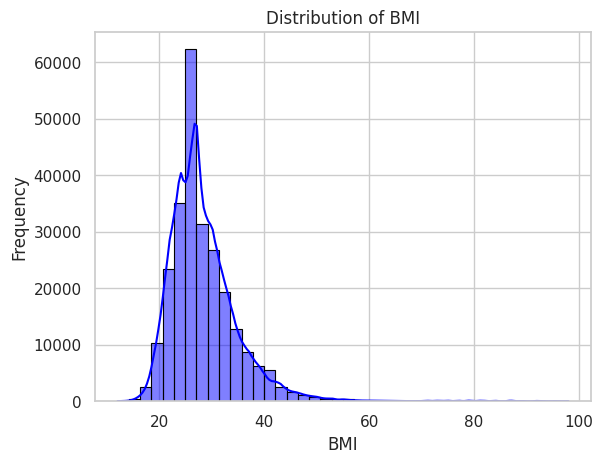

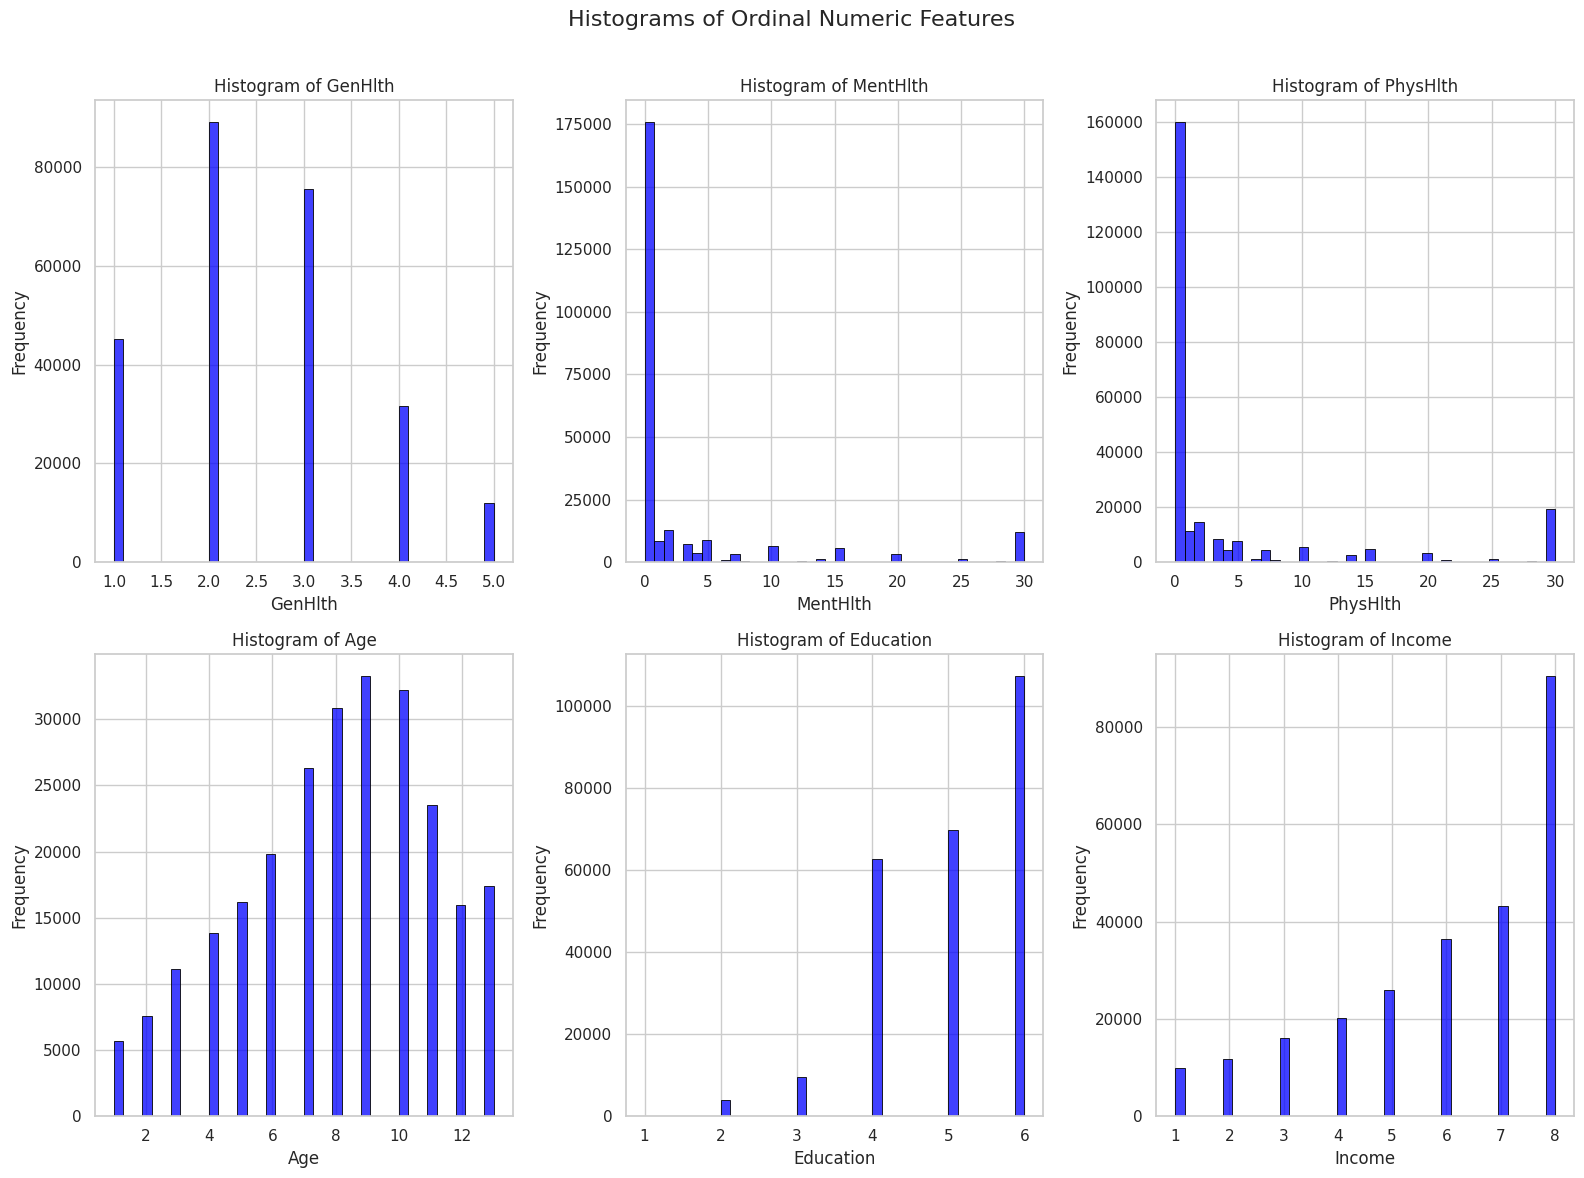

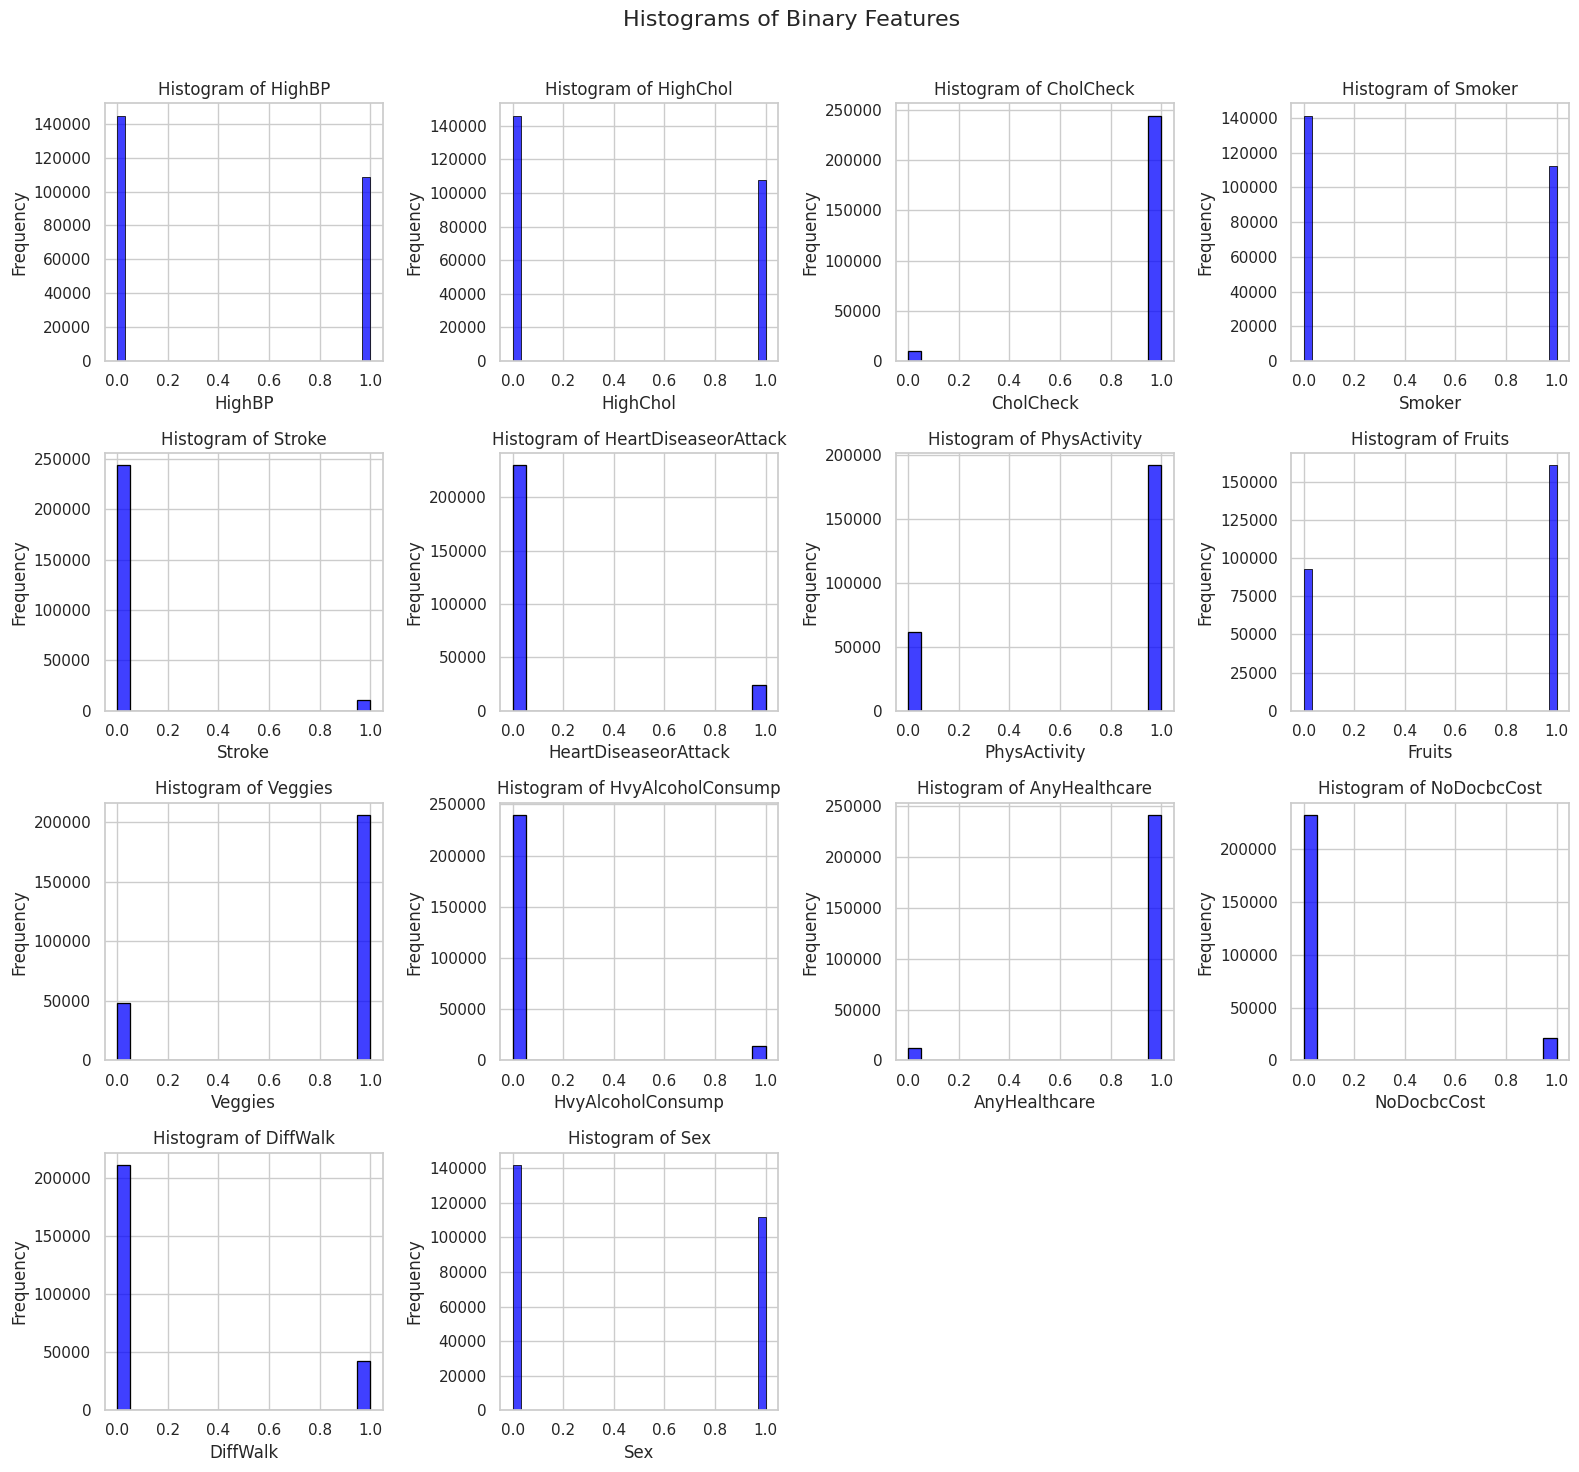

In [9]:
# Histograms for continuous numerical variables
sns.histplot(df['BMI'], bins=40, kde=True, edgecolor='black',color='blue')
plt.title('Distribution of BMI')
plt.ylabel("Frequency")
plt.show()

#Bar plots for ordinal numeric variables
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(ordinal_numeric_cols):
    sns.histplot(df[col], bins=40,  ax=axes[i], edgecolor='black',color='blue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Ordinal Numeric Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Bar plots for binary variables
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 15))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(binary_cols):
    sns.histplot(df[col],   ax=axes[i], edgecolor='black',color='blue')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Histograms of Binary Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

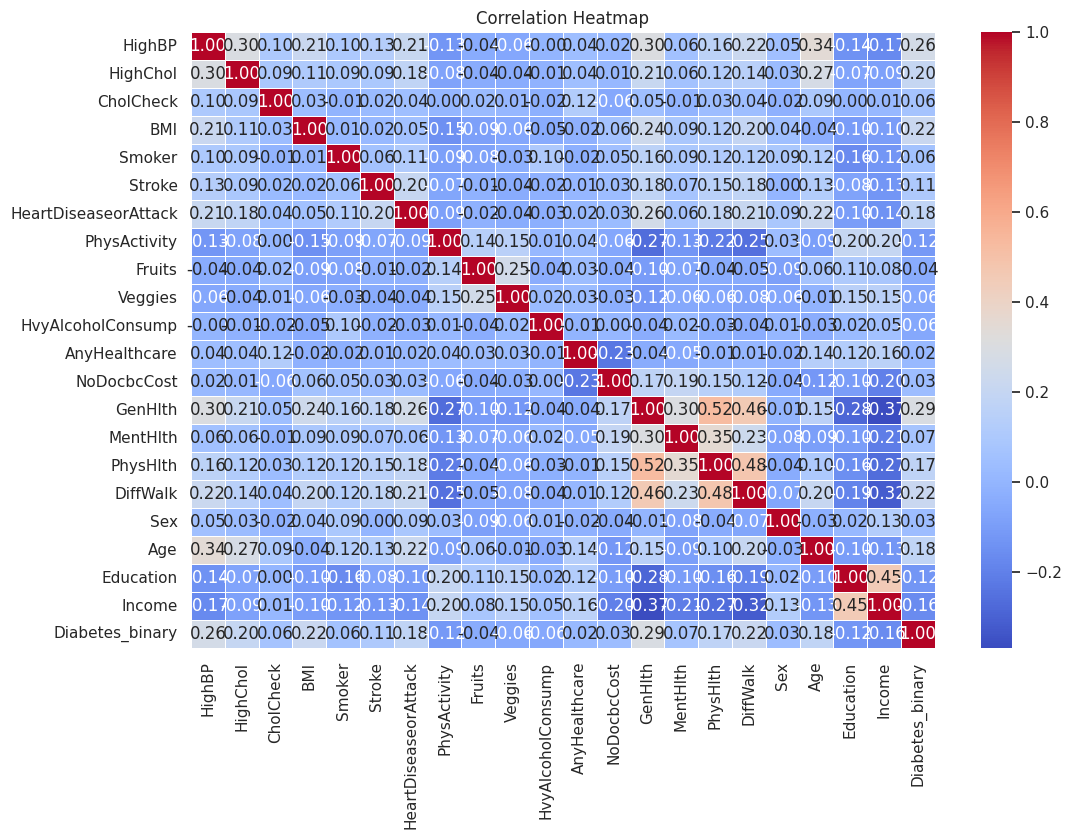

In [10]:
# Correlation Matrix
# Select numerical columns only

#drop ID column from df
df.drop(columns=['ID'], inplace=True)
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()  # Only numeric columns
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the correlation matrix, we can observe that no features are highly correlated with each other. The highest correlation is between ```PhysHlth``` and ```GenHlth``` with a correlation of 0.52.

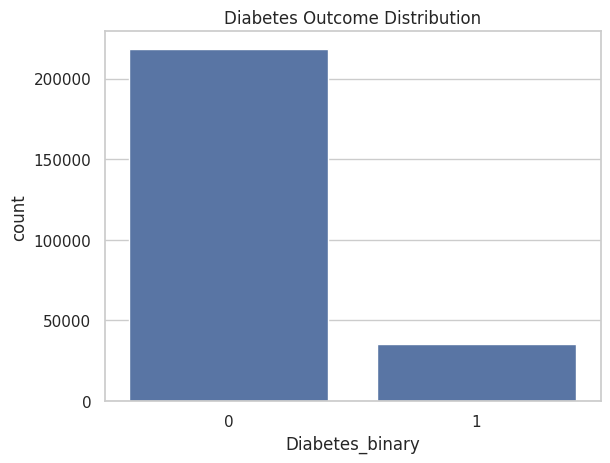

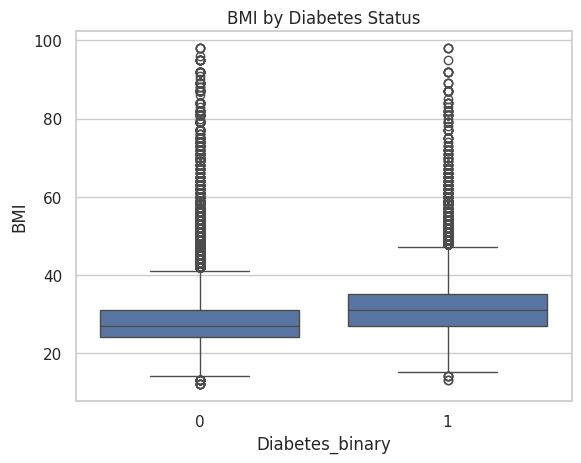

In [11]:
# Target variable
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Diabetes Outcome Distribution')
plt.show()

# Example: BMI vs Diabetes
sns.boxplot(x='Diabetes_binary', y='BMI', data=df)
plt.title('BMI by Diabetes Status')
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


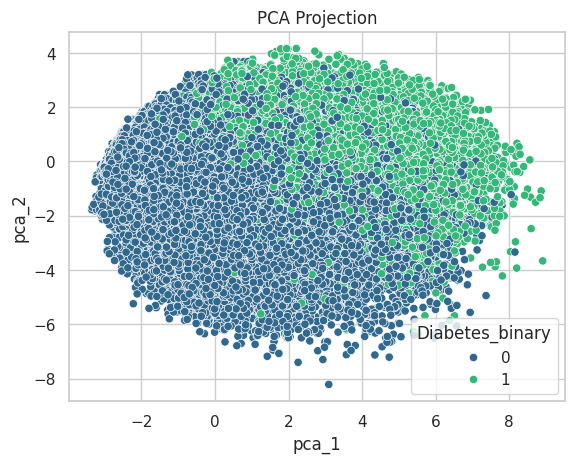

In [12]:
# Scale numeric features
df_PCA = df.copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_PCA)

# Apply PCA
pca = PCA(n_components=2, random_state=0)
pca_result = pca.fit_transform(X_scaled)

# Add to dataframe for plotting
df_PCA['pca_1'] = pca_result[:,0]
df_PCA['pca_2'] = pca_result[:,1]

sns.scatterplot(x='pca_1', y='pca_2', hue='Diabetes_binary', data=df_PCA, palette='viridis')
plt.title('PCA Projection')
plt.show()

In [13]:
# Fit KMeans
df_kmeans = df.copy()
kmeans = KMeans(n_clusters=2, random_state=42)
df_kmeans['cluster'] = kmeans.fit_predict(X_scaled)

sns.scatterplot(
    x='pca_1', y='pca_2',
    hue='cluster',
    data=df_kmeans,
    palette='Set2',
    alpha=0.7,
    edgecolor='k'
)
plt.title('Clusters visualized on PCA-reduced data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

ValueError: Could not interpret value `pca_1` for `x`. An entry with this name does not appear in `data`.

In [14]:
pd.crosstab(df_kmeans['cluster'], df_kmeans['Diabetes_binary'], normalize='index')
# This will show the proportion of diabetes status within each cluster

Diabetes_binary,0,1
cluster,,
0,0.633538,0.366462
1,0.946299,0.053701


# Feature Engineering & Preprocessing

In [ ]:
print(X)

In [15]:
# do standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()        # subtract mean, divide by std‑dev
X_scaled = pd.DataFrame(
    scaler.fit_transform(X),     # returns a NumPy array
    columns=X.columns,
)

In [ ]:
print(X_scaled)

In [ ]:
print(y)

Starting feature engineering process...
Original dataset shape: (253680, 21)


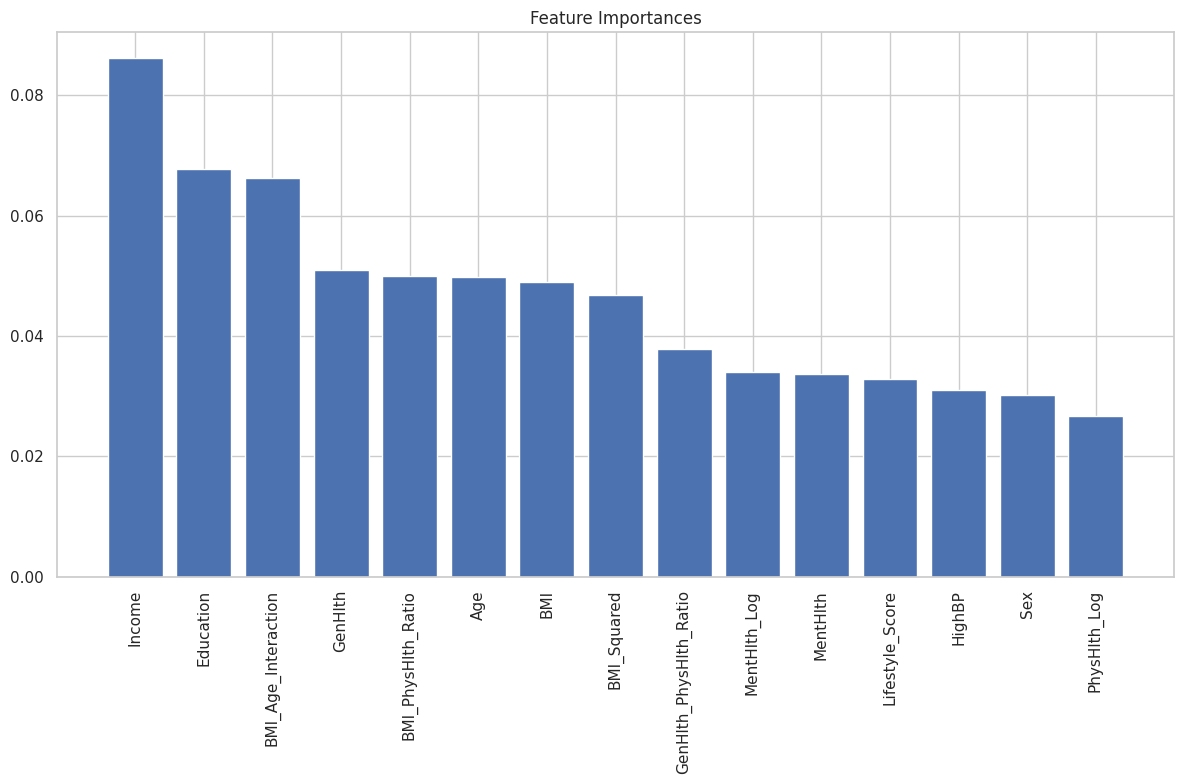


Final engineered dataset shape: (253680, 40)
Dataset after feature selection: (253680, 20)
Top 20 features: ['Income', 'Education', 'BMI_Age_Interaction', 'GenHlth', 'BMI_PhysHlth_Ratio', 'Age', 'BMI', 'BMI_Squared', 'GenHlth_PhysHlth_Ratio', 'MentHlth_Log', 'MentHlth', 'Lifestyle_Score', 'HighBP', 'Sex', 'PhysHlth_Log', 'PhysHlth', 'DiffWalk', 'Fruits', 'Health_Risk_Score', 'HighChol']


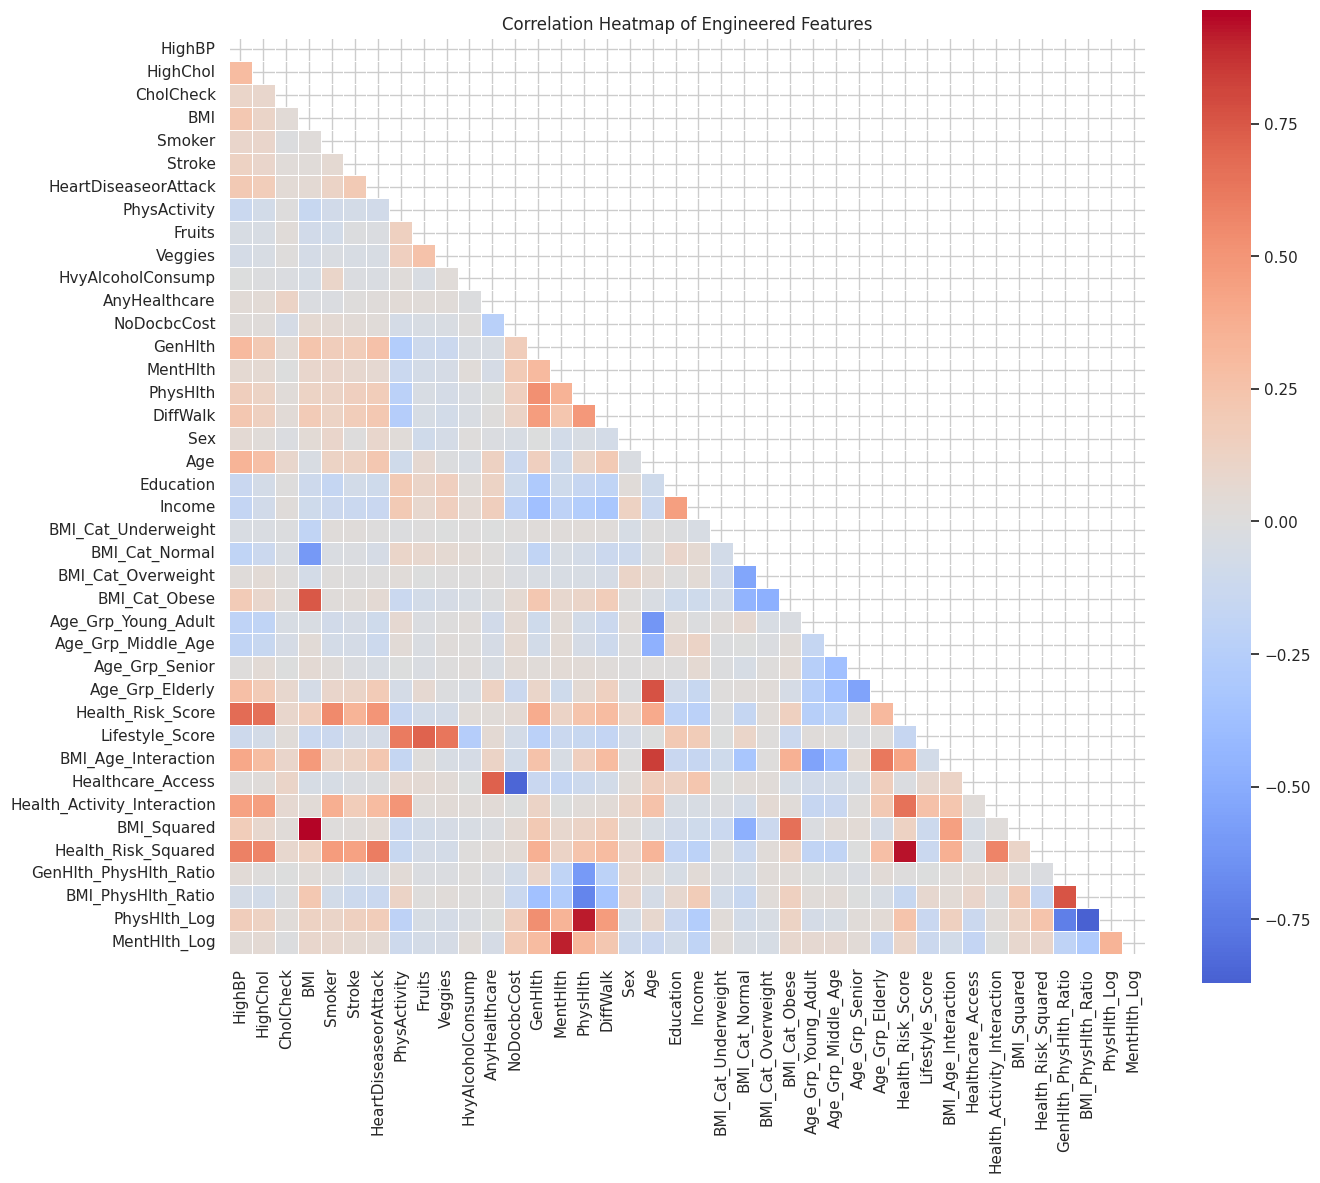


Feature engineering complete! Ready for model training.


In [16]:
# Continue with the preprocessed dataframe (X, y) from your teammate's code

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Let's create a copy to avoid modifying the original data
X_fe = X.copy()

print("Starting feature engineering process...")
print(f"Original dataset shape: {X_fe.shape}")

# ---- 1. HANDLING INTERACTIONS AND COMBINATIONS ----

# Create BMI categories (clinical standards)
X_fe['BMI_Category'] = pd.cut(
    X_fe['BMI'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight', 'Normal', 'Overweight', 'Obese']
)
# Convert to dummy variables
bmi_dummies = pd.get_dummies(X_fe['BMI_Category'], prefix='BMI_Cat')
X_fe = pd.concat([X_fe, bmi_dummies], axis=1)
X_fe.drop('BMI_Category', axis=1, inplace=True)

# Create Age groups with more intuitive labels
# Original Age: 1=18-24, 2=25-29, 3=30-34, 4=35-39, 5=40-44, 6=45-49, 7=50-54, 8=55-59, 9=60-64, 10=65-69, 11=70-74, 12=75-79, 13=80+
X_fe['Age_Group'] = pd.cut(
    X_fe['Age'],
    bins=[0, 3, 6, 9, 13],
    labels=['Young_Adult', 'Middle_Age', 'Senior', 'Elderly']
)
age_dummies = pd.get_dummies(X_fe['Age_Group'], prefix='Age_Grp')
X_fe = pd.concat([X_fe, age_dummies], axis=1)
X_fe.drop('Age_Group', axis=1, inplace=True)

# Create health risk score (combination of multiple risk factors)
X_fe['Health_Risk_Score'] = (X_fe['HighBP'] + X_fe['HighChol'] +
                             X_fe['Smoker'] + X_fe['Stroke'] +
                             X_fe['HeartDiseaseorAttack'])

# Create lifestyle score
X_fe['Lifestyle_Score'] = (X_fe['PhysActivity'] + X_fe['Fruits'] +
                          X_fe['Veggies'] - X_fe['HvyAlcoholConsump'])

# BMI and Age interaction
X_fe['BMI_Age_Interaction'] = X_fe['BMI'] * X_fe['Age']

# Create healthcare access composite
X_fe['Healthcare_Access'] = X_fe['AnyHealthcare'] - X_fe['NoDocbcCost']

# Health conditions and physical activity interaction
X_fe['Health_Activity_Interaction'] = X_fe['Health_Risk_Score'] * X_fe['PhysActivity']

# ---- 2. POLYNOMIAL FEATURES ----

# Square of BMI (for capturing non-linear relationships)
X_fe['BMI_Squared'] = X_fe['BMI'] ** 2

# Square of Health Risk Score
X_fe['Health_Risk_Squared'] = X_fe['Health_Risk_Score'] ** 2

# ---- 3. RATIO FEATURES ----

# Calculate ratio of GenHlth (General Health 1-5 scale) to PhysHlth (Physical Health 0-30 days)
# Add small constant to avoid division by zero
X_fe['GenHlth_PhysHlth_Ratio'] = X_fe['GenHlth'] / (X_fe['PhysHlth'] + 1)

# BMI to Physical Health ratio
X_fe['BMI_PhysHlth_Ratio'] = X_fe['BMI'] / (X_fe['PhysHlth'] + 1)

# ---- 4. LOG TRANSFORMATIONS FOR SKEWED VARIABLES ----

# Log transform for skewed variables (adding 1 to avoid log(0))
X_fe['PhysHlth_Log'] = np.log1p(X_fe['PhysHlth'])
X_fe['MentHlth_Log'] = np.log1p(X_fe['MentHlth'])

# ---- 5. FEATURE SCALING ----

# Select numerical columns that need scaling
# Exclude binary, dummy variables, and already engineered features
cols_to_scale = ['BMI', 'Age', 'GenHlth', 'PhysHlth', 'MentHlth',
                'BMI_Age_Interaction', 'Health_Risk_Score',
                'Lifestyle_Score', 'BMI_Squared', 'Health_Risk_Squared']

# Apply standardization
scaler = StandardScaler()
X_fe[cols_to_scale] = scaler.fit_transform(X_fe[cols_to_scale])

# ---- 6. FEATURE SELECTION ----

# Use ExtraTreesClassifier for feature importance
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_fe, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the top 15 features
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(min(15, len(indices))), importances[indices[:15]], align='center')
plt.xticks(range(min(15, len(indices))), X_fe.columns[indices[:15]], rotation=90)
plt.tight_layout()
plt.show()

# Select top K features based on importance
top_k = 20  # Adjust based on your requirements
top_features = X_fe.columns[indices[:top_k]]
X_fe_selected = X_fe[top_features]

print(f"\nFinal engineered dataset shape: {X_fe.shape}")
print(f"Dataset after feature selection: {X_fe_selected.shape}")
print(f"Top {top_k} features: {list(top_features)}")

# Create a correlation heatmap for the engineered features
plt.figure(figsize=(14, 12))
corr = X_fe.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm',
           center=0, square=True, linewidths=.5)
plt.title('Correlation Heatmap of Engineered Features')
plt.tight_layout()
plt.show()

# Final dataset for model training
X_train_final = X_fe_selected
y_train = y

print("\nFeature engineering complete! Ready for model training.")

# # Model Building & Comparison & Selection part1


In [ ]:
# 1. Import required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Prepare data
print(X_train_final.shape)
print(y_train.shape)

# Split into train and validation sets (80% train, 20% validation)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

# 3. Define models and hyperparameter grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l2'],
        'solver': ['lbfgs']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# 4. GridSearchCV: Train and tune models
best_models = {}
for name in models:
    print(f"\nTraining and tuning {name}...")
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=5,
        scoring='recall',  # Focus on recall
        n_jobs=-1
    )
    grid.fit(X_train, y_train_split)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

# 5. Evaluate models on validation set
results = []
for name, model in best_models.items():
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_pred))

# 6. Summarize results
results_df = pd.DataFrame(results)
print("\n=== Model Comparison ===")
display(results_df)

# 7. Plot ROC Curves
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    RocCurveDisplay.from_estimator(model, X_val, y_val, name=name)
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.title('ROC Curves for Models')
plt.show()

# 8. Select the final model based on Recall
final_model_name = results_df.sort_values(by='Recall', ascending=False).iloc[0]['Model']
final_model = best_models[final_model_name]
print(f"\nSelected final model: {final_model_name}")

# 9. Retrain final model on the full training set
final_model.fit(X_train_final, y_train)
print("Final model retrained on full training set.")

In the second iteration, I aimed to improve the model’s sensitivity to detecting diabetes (Recall). I adjusted class weights, optimized for recall in hyperparameter tuning, and experimented with threshold calibration to rebalance the trade-off between precision and recall.

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Confirm you have your final processed features
print(X_train_final.shape)
print(y_train.shape)

# 3. Split dataset for cross-validation
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

# 4. Define models with focus on Recall
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=(y_train_split==0).sum() / (y_train_split==1).sum(), random_state=42)
}

# 5. New parameter grids (more detailed tuning)
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 5, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
}

# 6. Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 7. Train with GridSearchCV (optimize for Recall)
best_models = {}
for name in models:
    print(f"\nTraining and tuning {name}...")
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        cv=cv,
        scoring='recall',
        n_jobs=-1,
        verbose=2
    )
    grid.fit(X_train, y_train_split)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

# 8. Evaluate models
results = []

for name, model in best_models.items():
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob) if y_prob is not None else None

    results.append({
        'Model': name,
        'Recall': recall,
        'ROC AUC': auc
    })

    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_val, y_pred))

# 9. Summarize
results_df = pd.DataFrame(results)
print("\n=== Model Comparison (Recall Focus) ===")
display(results_df)

# 10. Draw ROC Curve
plt.figure(figsize=(10, 8))
for name, model in best_models.items():
    RocCurveDisplay.from_estimator(model, X_val, y_val, name=name)
plt.title('ROC Curves for Models')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.show()

# 11. Select the best model
final_model_name = results_df.sort_values(by='Recall', ascending=False).iloc[0]['Model']
final_model = best_models[final_model_name]
print(f"\nSelected final model based on Recall: {final_model_name}")

# 12. Retrain on full dataset
final_model.fit(X_train_final, y_train)
print("Final model retrained on full training set.")

In [ ]:
# 1. Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt

# 2. Split data again (if not already split)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# 3. Define models & fine-tuned param grids
models = {
    'Logistic Regression': LogisticRegression(max_iter=5000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'C': [0.5, 1, 1.5],
        'solver': ['lbfgs', 'liblinear']
    },
    'Random Forest': {
        'n_estimators': [100, 150, 200],
        'max_depth': [4, 5, 6],
        'min_samples_split': [3, 5],
        'min_samples_leaf': [1, 2]
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 4],
        'subsample': [0.8, 1.0]
    }
}

# 4. Grid search with recall focus
best_models = {}
for name in models:
    print(f"\nTraining and fine-tuning {name}...")
    grid = GridSearchCV(
        estimator=models[name],
        param_grid=param_grids[name],
        scoring='recall',
        cv=5,
        n_jobs=-1,
        verbose=1
    )
    grid.fit(X_train, y_train_split)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")

# 5. Evaluate performance
results = []
plt.figure(figsize=(10, 8))

for name, model in best_models.items():
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'ROC AUC': auc
    })

    RocCurveDisplay.from_estimator(model, X_val, y_val, name=name)

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curves for All Models (Round 3)')
plt.show()

# 6. Show table & final model
results_df = pd.DataFrame(results)
print("\n=== Model Comparison (Round 3: Fine-Tuned) ===")
display(results_df)

final_model_name = results_df.sort_values(by='Recall', ascending=False).iloc[0]['Model']
final_model = best_models[final_model_name]
print(f"\nSelected final model based on Recall: {final_model_name}")

final_model.fit(X_train_final, y_train)
print("Final model retrained on full training set.")

In [ ]:
from xgboost import XGBClassifier

# Rebuild the best XGBoost model from Round 2
final_model = XGBClassifier(
    learning_rate=0.01,
    max_depth=3,
    n_estimators=100,
    subsample=1.0,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Retrain on the full training dataset
final_model.fit(X_train_final, y_train)

print("✅ Final XGBoost model (from Round 2) retrained on full dataset.")

# Model Comparison & Selection part2


In [17]:
!pip install catboost > /dev/null

Train shape: (202944, 20)
Validation shape: (50736, 20)

=== Baseline Model Training ===

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43667
           1       0.42      0.21      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.55      0.15      0.24      7069

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736


Classification Report for CatBoost (GPU):
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.56    

<Figure size 1000x800 with 0 Axes>

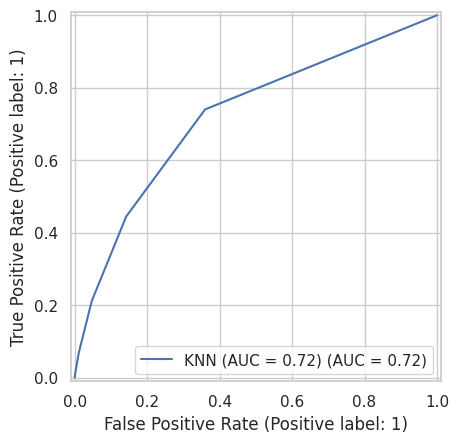

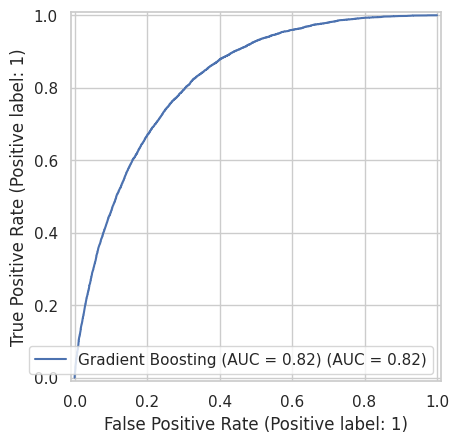

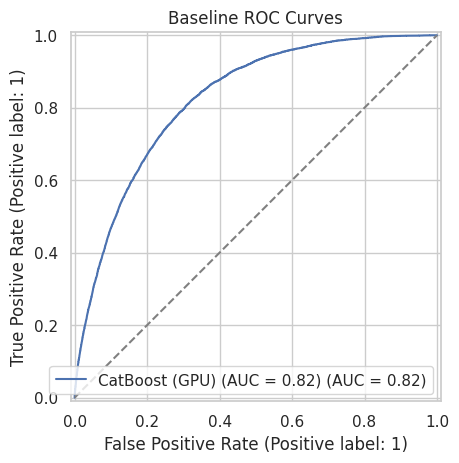


=== Baseline Results ===
               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                KNN  0.849417   0.419826  0.211487  0.281279  0.722380
1  Gradient Boosting  0.864278   0.545681  0.154619  0.240961  0.822608
2     CatBoost (GPU)  0.865086   0.557613  0.153346  0.240541  0.824206

=== Parameter Optimization (Recall Priority) ===

Tuning KNN for recall...
Best recall-tuned params for KNN: {'n_neighbors': 5}

Tuning Gradient Boosting for recall...
Best recall-tuned params for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Tuning CatBoost (GPU) for recall...
Best recall-tuned params for CatBoost (GPU): {'depth': 6, 'iterations': 100, 'learning_rate': 0.1}

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43667
           1       0.42      0.21      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.65

<Figure size 1000x800 with 0 Axes>

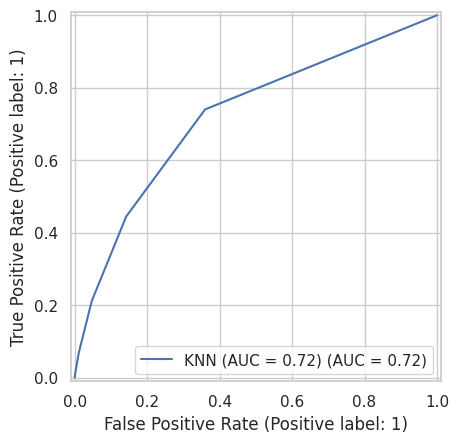

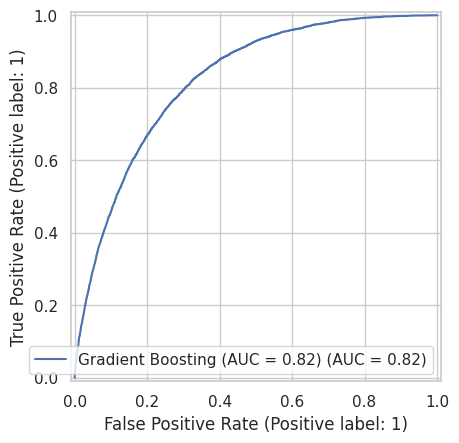

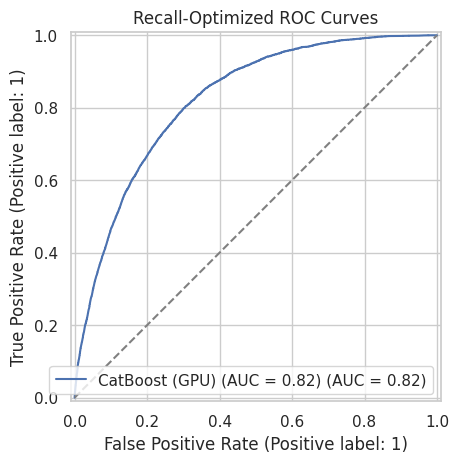


=== Recall-Optimized Results ===
               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                KNN  0.849417   0.419826  0.211487  0.281279  0.722380
1  Gradient Boosting  0.864298   0.545954  0.154619  0.240988  0.822619
2     CatBoost (GPU)  0.864869   0.556260  0.148960  0.234992  0.823286

=== Fine-Tuning for Stability ===

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43667
           1       0.42      0.21      0.28      7069

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43667
           1       0.55      0.15      0.24      7069

    accuracy                           0.86     50736
   macro avg       0

<Figure size 1000x800 with 0 Axes>

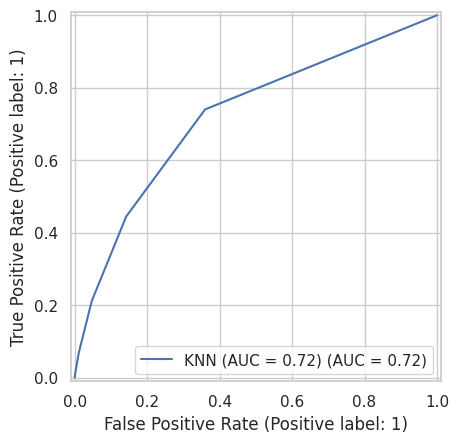

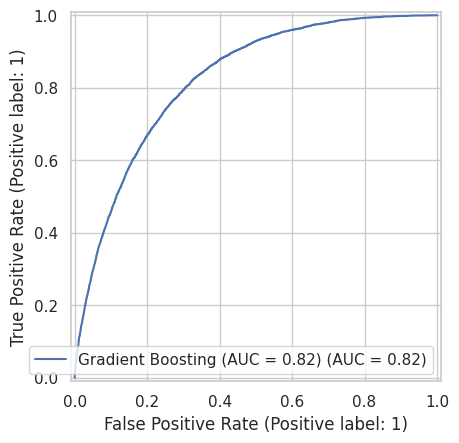

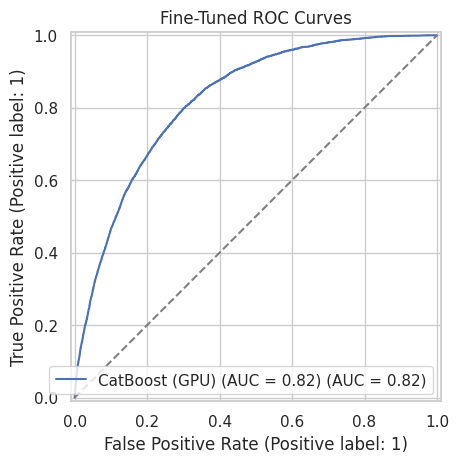


=== Fine-Tuned Results ===
               Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                KNN  0.849417   0.419826  0.211487  0.281279  0.722380
1  Gradient Boosting  0.864298   0.545954  0.154619  0.240988  0.822619
2     CatBoost (GPU)  0.864869   0.556260  0.148960  0.234992  0.823286

✅ Selected Final Model: KNN
Final model retrained on full training set.


In [18]:
# STEP 1: Imports
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report, RocCurveDisplay
)
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier

# STEP 2: Train-validation split (assume X_train_final and y_train already exist)
X_train, X_val, y_train_split, y_val = train_test_split(
    X_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)

# STEP 3: Evaluation function
def evaluate_models(models, X_val, y_val, display_roc=True, title="ROC Curves"):
    results = []
    plt.figure(figsize=(10, 8))

    for name, model in models.items():
        y_pred = model.predict(X_val)
        y_prob = model.predict_proba(X_val)[:, 1]

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        auc = roc_auc_score(y_val, y_prob)

        results.append({
            'Model': name,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'ROC AUC': auc
        })

        print(f"\nClassification Report for {name}:")
        print(classification_report(y_val, y_pred))

        if display_roc:
            RocCurveDisplay.from_estimator(model, X_val, y_val, name=f"{name} (AUC = {auc:.2f})")

    if display_roc:
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.title(title)
        plt.grid(True)
        plt.show()

    return pd.DataFrame(results)

# === PHASE 1: BASELINE MODELING ===
print("\n=== Baseline Model Training ===")
baseline_models = {
    'KNN': KNeighborsClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'CatBoost (GPU)': CatBoostClassifier(verbose=0, task_type='GPU', random_state=42)
}

for name in baseline_models:
    baseline_models[name].fit(X_train, y_train_split)

baseline_results = evaluate_models(baseline_models, X_val, y_val, title="Baseline ROC Curves")
print("\n=== Baseline Results ===")
print(baseline_results)

# === PHASE 2: RECALL-PRIORITY GRID SEARCH ===
print("\n=== Parameter Optimization (Recall Priority) ===")
param_grids = {
    'KNN': {'n_neighbors': [5, 7]},
    'Gradient Boosting': {
        'n_estimators': [100],
        'learning_rate': [0.1],
        'max_depth': [3]
    },
    'CatBoost (GPU)': {
        'iterations': [100],
        'depth': [4, 6],
        'learning_rate': [0.1]
    }
}

recall_models = {}
for name in baseline_models:
    print(f"\nTuning {name} for recall...")
    grid = GridSearchCV(
        estimator=baseline_models[name],
        param_grid=param_grids[name],
        cv=3,
        scoring='recall',  # <- PRIORITIZE RECALL HERE
        n_jobs=-1
    )
    grid.fit(X_train, y_train_split)
    recall_models[name] = grid.best_estimator_
    print(f"Best recall-tuned params for {name}: {grid.best_params_}")

recall_results = evaluate_models(recall_models, X_val, y_val, title="Recall-Optimized ROC Curves")
print("\n=== Recall-Optimized Results ===")
print(recall_results)

# === PHASE 3: FINE-TUNING ===
# You can adjust param_grids again here if needed. For now, reuse recall-optimized models.
print("\n=== Fine-Tuning for Stability ===")
finetuned_models = recall_models  # Or redefine with new param ranges
finetuned_results = evaluate_models(finetuned_models, X_val, y_val, title="Fine-Tuned ROC Curves")
print("\n=== Fine-Tuned Results ===")
print(finetuned_results)

# === FINAL MODEL SELECTION ===
final_model_name = finetuned_results.sort_values(by='Recall', ascending=False).iloc[0]['Model']
final_model = finetuned_models[final_model_name]
print(f"\n✅ Selected Final Model: {final_model_name}")

# === RETRAIN FINAL MODEL ON FULL TRAINING SET ===
final_model.fit(X_train_final, y_train)
print("Final model retrained on full training set.")